In [231]:
#Import

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns',False)

In [232]:
df= pd.read_csv('depart_employes.csv',sep=';',header=0)
df.head(10)


,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,depart,promotion_5_dernieres_annees,Service,niveau_salaire
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [233]:


df.columns=df.columns.str.lower()

def info_df(df):
    df_info=pd.DataFrame(columns=['id','type','na_value','unique_value','value_1','value_2','value_3'])
    liste=[]
    for column in df:
        liste.append(column)
        liste.append(df[column].dtypes)
        liste.append(df[column].isnull().sum(axis=0))
        liste.append(len(df[column].value_counts()))
        liste.append(df[column].iloc[0])
        liste.append(df[column].iloc[1])
        liste.append(df[column].iloc[2])
        
        df_info.loc[len(df_info.index)]= liste
        liste=[]
        
    df_info.set_index('id',inplace=True)
    return df_info

display(info_df(df))





,type,na_value,unique_value,value_1,value_2,value_3
id,,,,,,
satisfaction,float64,0,92,0.38,0.8,0.11
derniere_evaluation,float64,0,65,0.53,0.86,0.88
nombre_de_projets,int64,0,6,2.0,5.0,7.0
nombre_heures_mensuelles_moyenne,int64,0,215,157.0,262.0,272.0
temps_passe_dans_entreprise,int64,0,8,3.0,6.0,4.0
accident_du travail,int64,0,2,0.0,0.0,0.0
depart,int64,0,2,1.0,1.0,1.0
promotion_5_dernieres_annees,int64,0,2,0.0,0.0,0.0
service,object,0,10,sales,sales,sales


In [234]:
display(df.describe())

,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise,accident_du travail,depart,promotion_5_dernieres_annees
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [235]:
df.duplicated(keep="first").sum()

3008

In [236]:
df.drop_duplicates(inplace=True)

In [237]:
df.reset_index()

,index,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise,accident_du travail,depart,promotion_5_dernieres_annees,service,niveau_salaire
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
11986,11995,0.90,0.55,3,259,10,1,0,1,management,high
11987,11996,0.74,0.95,5,266,10,0,0,1,management,high
11988,11997,0.85,0.54,3,185,10,0,0,1,management,high
11989,11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [238]:
df['depart'].value_counts()

depart
0    10000
1     1991
Name: count, dtype: int64

In [239]:
columns_quanti=['satisfaction','derniere_evaluation','nombre_de_projets','nombre_heures_mensuelles_moyenne','temps_passe_dans_entreprise','depart']

df_quanti=df[columns_quanti]
# Calculer la moyenne des variables en fonction de la colonne 'depart'
moyennes = df_quanti.groupby('depart').mean()

display(moyennes)

,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise
depart,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000
1,0.440271,0.721783,3.883476,208.16223,3.881467


C:\Users\natha\AppData\Local\Temp\ipykernel_25796\912752907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='niveau_salaire', y='depart', data=proportions, palette='viridis')


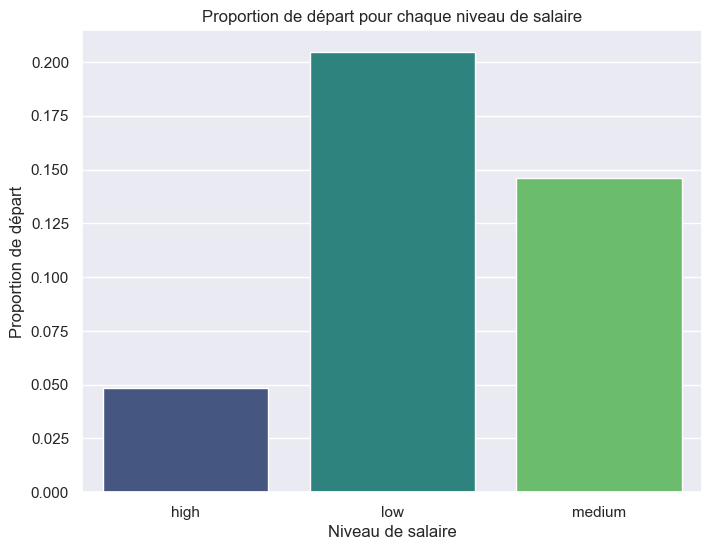

In [240]:
# Calculer la proportion de départ pour chaque niveau de salaire
proportions = df.groupby('niveau_salaire')['depart'].mean().reset_index()

# Tracer le graphique à barres
plt.figure(figsize=(8, 6))
sns.barplot(x='niveau_salaire', y='depart', data=proportions, palette='viridis')
plt.title('Proportion de départ pour chaque niveau de salaire')
plt.xlabel('Niveau de salaire')
plt.ylabel('Proportion de départ')
plt.show()

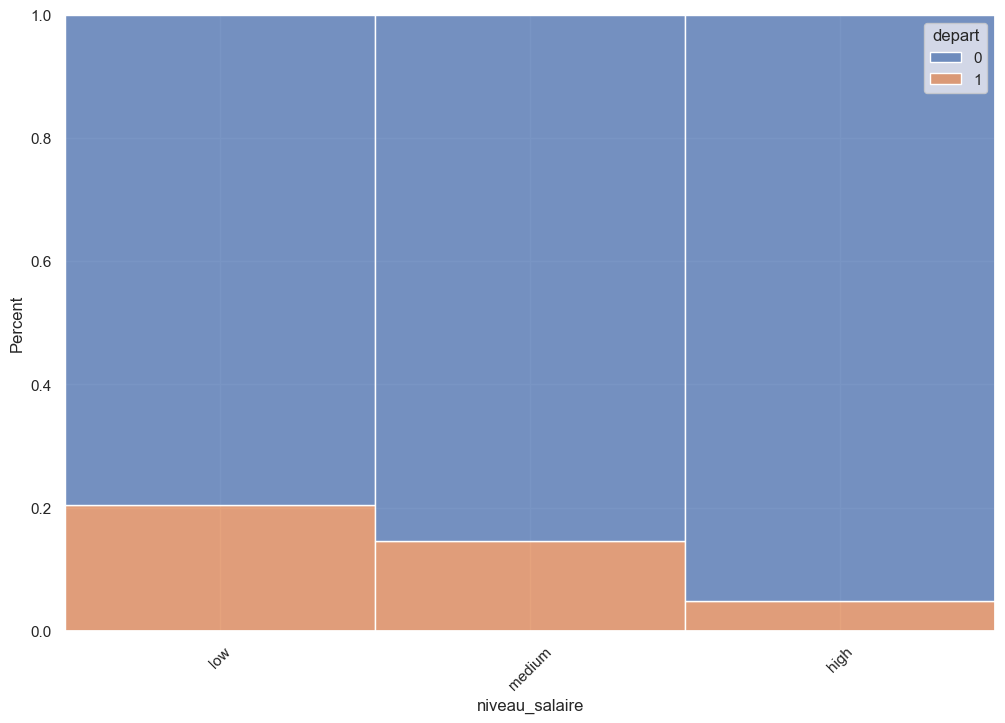

In [241]:
# Assurez-vous que seaborn est en mode couleur par défaut
sns.set()

# Création du graphique avec seaborn avec des espaces blancs entre les barres
plt.figure(figsize=(12, 8))  # Ajustement de la taille du graphique
sns.histplot(data=df, x="niveau_salaire", hue="depart", multiple="fill", stat="percent")
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.show()

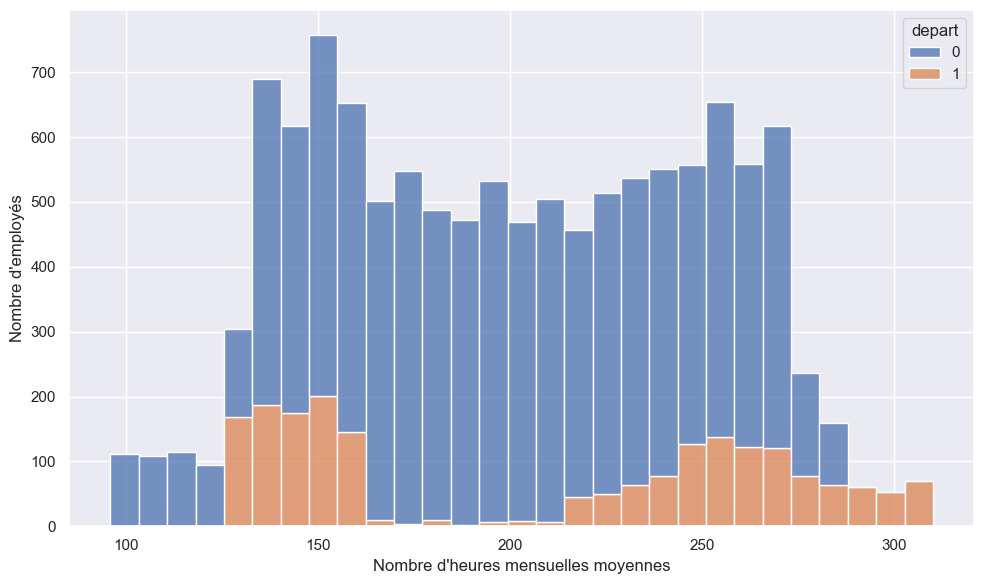

In [242]:
# Création du graphique avec seaborn en empilant les barres les unes au-dessus des autres
# Création du graphique avec seaborn en empilant les barres les unes au-dessus des autres et en enlevant la courbe de densité (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df["nombre_heures_mensuelles_moyenne"], hue=df["depart"], multiple="stack", kde=False)
plt.xlabel("Nombre d'heures mensuelles moyennes")  # Ajout de l'étiquette pour l'axe x
plt.ylabel("Nombre d'employés")  # Ajout de l'étiquette pour l'axe y
plt.tight_layout()
plt.show()

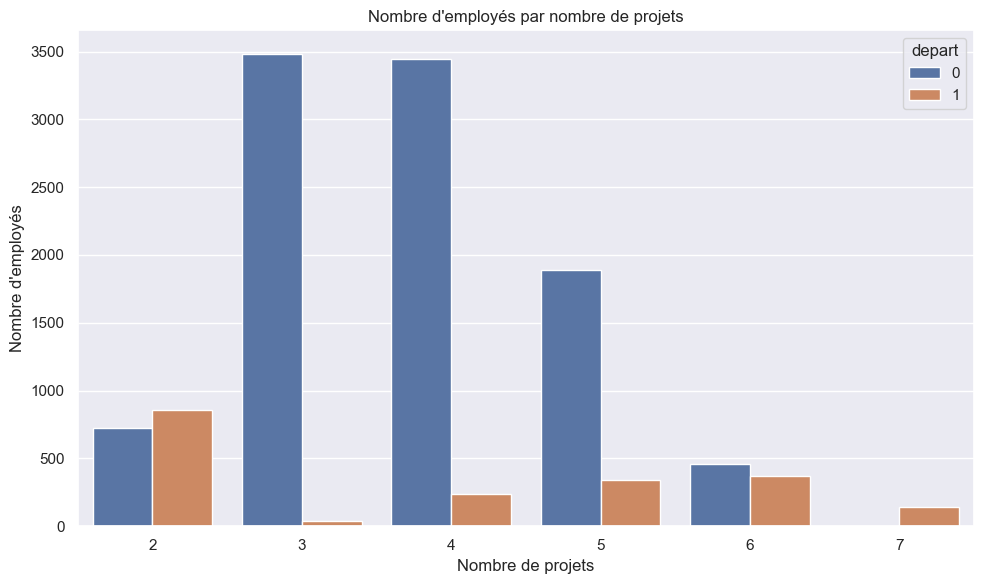

In [243]:
# Création du graphique avec seaborn en empilant les barres de départ et de non-départ les unes au-dessus des autres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="nombre_de_projets", hue=df["depart"])
plt.title("Nombre d'employés par nombre de projets")
plt.xlabel("Nombre de projets")  # Ajout de l'étiquette pour l'axe x
plt.ylabel("Nombre d'employés")
plt.tight_layout()
plt.show()

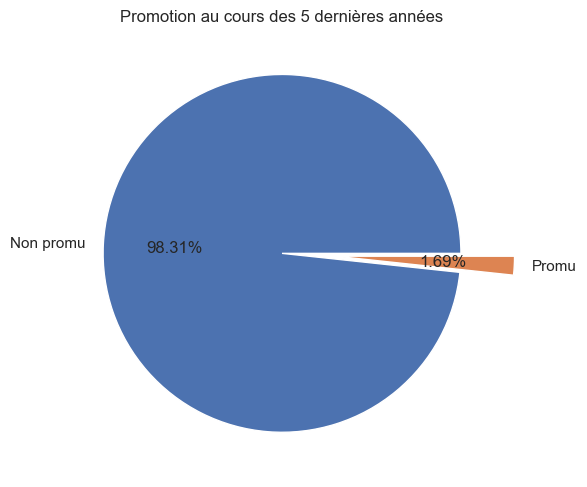

In [244]:
labels = df["promotion_5_dernieres_annees"].value_counts().index.tolist()
labels = ["Promu" if i == 1 else "Non promu" for i in labels]



plt.figure(figsize=(6, 6))
plt.pie(x = df["promotion_5_dernieres_annees"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion au cours des 5 dernières années")
plt.tight_layout()
plt.show()

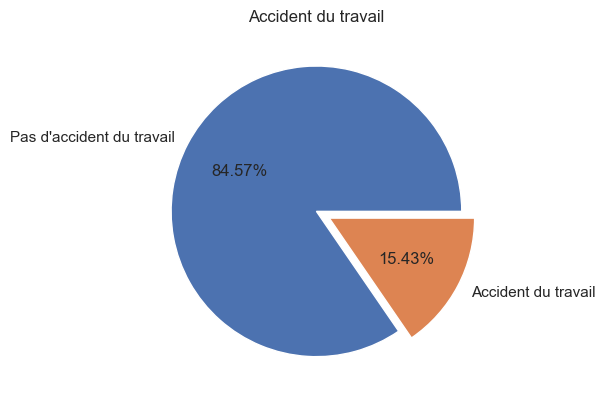

In [245]:
labels = df["accident_du travail"].value_counts().index.tolist()
labels = ["Accident du travail" if i == 1 else "Pas d'accident du travail" for i in labels]

plt.figure(figsize=(6, 6))
plt.pie(x = df["accident_du travail"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Accident du travail")
plt.tight_layout()
plt.show()

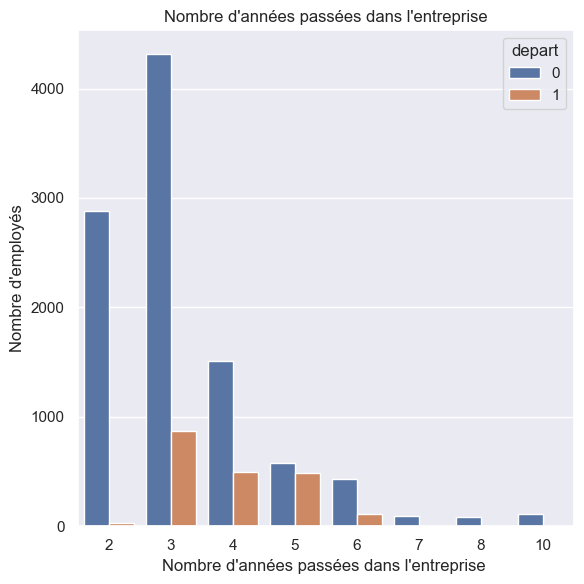

In [246]:
labels = df["temps_passe_dans_entreprise"].value_counts().index.tolist()

plt.figure(figsize=(6, 6))
sns.countplot(x = "temps_passe_dans_entreprise", data=df, hue=df["depart"])
plt.title("Nombre d'années passées dans l'entreprise")
plt.xlabel("Nombre d'années passées dans l'entreprise ")  # Ajout de l'étiquette pour l'axe x
plt.ylabel("Nombre d'employés")
plt.tight_layout()
plt.show()

In [247]:
df.rename(columns={"accident_du travail": "accident_du_travail"}, inplace=True)

In [248]:
df.columns

Index(['satisfaction', 'derniere_evaluation', 'nombre_de_projets',
       'nombre_heures_mensuelles_moyenne', 'temps_passe_dans_entreprise',
       'accident_du_travail', 'depart', 'promotion_5_dernieres_annees',
       'service', 'niveau_salaire'],
      dtype='object')

In [249]:
var_quant =[i for i in df.columns if i not in ['service','niveau_salaire','depart','promotion_5_dernieres_annees','accident_du_travail']]

df_quant=df[var_quant]
df_quant=df_quant.astype(float)

scaler = StandardScaler()

scaler.fit(df_quant)

df_quant_sc= pd.DataFrame(scaler.transform(df_quant),columns=df_quant.columns)

display(df_quant_sc)

,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291
1,0.706637,0.851380,1.029194,1.262709,1.981036
2,-2.155721,0.970190,2.748604,1.467939,0.477485
3,0.374770,0.910785,1.029194,0.462311,1.229261
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291
...,...,...,...,...,...
11986,1.121472,-0.990180,-0.690216,1.201140,4.988139
11987,0.457736,1.386026,1.029194,1.344801,4.988139
11988,0.914054,-1.049585,-0.690216,-0.317563,4.988139
11989,-1.243085,-0.396129,-0.690216,-0.584363,4.988139


In [250]:
encoded_service = pd.get_dummies(df["service"], prefix="service")
encoded_service.columns=encoded_service.columns.str.lower()
encoded_service

,service_it,service_randd,service_accounting,service_hr,service_management,service_marketing,service_product_mng,service_sales,service_support,service_technical
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,True,False,False,False,False,False
11996,False,False,False,False,True,False,False,False,False,False
11997,False,False,False,False,True,False,False,False,False,False
11998,False,False,False,False,False,True,False,False,False,False


In [251]:
data = df_quant_sc.join(encoded_service)

In [252]:
encoded_salaire = pd.get_dummies(df["niveau_salaire"], prefix="salaire")
encoded_salaire.columns=encoded_salaire.columns.str.lower()
encoded_salaire

,salaire_high,salaire_low,salaire_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
11995,True,False,False
11996,True,False,False
11997,True,False,False
11998,True,False,False


In [253]:
data = data.join(encoded_salaire)

In [254]:
data=data.join(df[ ['service','niveau_salaire','depart','promotion_5_dernieres_annees','accident_du_travail']])

In [255]:
data.drop(["service", "niveau_salaire"], inplace=True, axis="columns")
data.dropna(inplace=True)
data.head(10)

,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise,service_it,service_randd,service_accounting,service_hr,service_management,service_marketing,service_product_mng,service_sales,service_support,service_technical,salaire_high,salaire_low,salaire_medium,depart,promotion_5_dernieres_annees,accident_du_travail
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0
1,0.706637,0.851380,1.029194,1.262709,1.981036,False,False,False,False,False,False,False,True,False,False,False,False,True,1.0,0.0,0.0
2,-2.155721,0.970190,2.748604,1.467939,0.477485,False,False,False,False,False,False,False,True,False,False,False,False,True,1.0,0.0,0.0
3,0.374770,0.910785,1.029194,0.462311,1.229261,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0
5,-0.911218,-1.287206,-1.549921,-0.974300,-0.274291,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0
6,-2.197205,0.316733,1.888899,0.954864,0.477485,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0
7,1.204439,0.791975,1.029194,1.201140,1.229261,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0
8,1.079988,1.683052,1.029194,0.482834,1.229261,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0
9,-0.869734,-1.108990,-1.549921,-1.200053,-0.274291,False,False,False,False,False,False,False,True,False,False,False,True,False,1.0,0.0,0.0


In [256]:
X = data.drop("depart", axis=1)
y = data["depart"]

In [257]:
display(data[data.isna().any(axis=1)])

,satisfaction,derniere_evaluation,nombre_de_projets,nombre_heures_mensuelles_moyenne,temps_passe_dans_entreprise,service_it,service_randd,service_accounting,service_hr,service_management,service_marketing,service_product_mng,service_sales,service_support,service_technical,salaire_high,salaire_low,salaire_medium,depart,promotion_5_dernieres_annees,accident_du_travail


In [258]:
info_df(X)

,type,na_value,unique_value,value_1,value_2,value_3
id,,,,,,
satisfaction,float64,0,92,-1.035668,0.706637,-2.155721
derniere_evaluation,float64,0,65,-1.108990,0.851380,0.970190
nombre_de_projets,float64,0,6,-1.549921,1.029194,2.748604
nombre_heures_mensuelles_moyenne,float64,0,215,-0.892208,1.262709,1.467939
temps_passe_dans_entreprise,float64,0,8,-0.274291,1.981036,0.477485
service_it,object,0,2,0.000000,0.000000,0.000000
service_randd,object,0,2,0.000000,0.000000,0.000000
service_accounting,object,0,2,0.000000,0.000000,0.000000
service_hr,object,0,2,0.000000,0.000000,0.000000


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<Axes: >

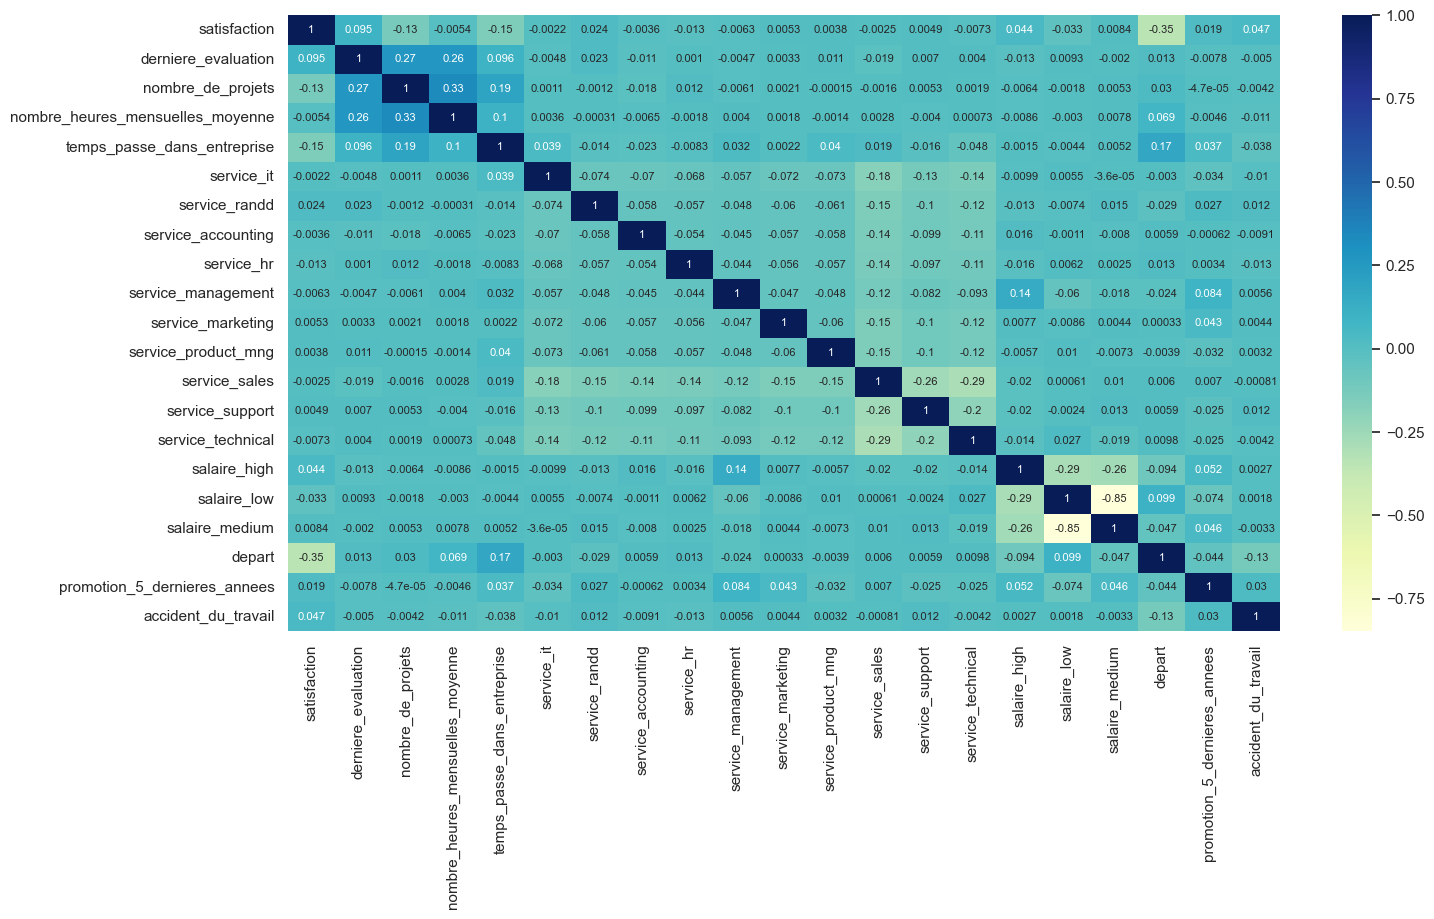

In [260]:
plt.figure(figsize=(16,8))
correlation=data.corr()
sns.heatmap(correlation,cmap="YlGnBu",annot=True,annot_kws={"size": 8})

In [262]:
# Initialisation des modèles
models = {
    "Régression Logistique": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN":KNeighborsClassifier(n_neighbors=10)
}

# Entraînement et évaluation des modèles
for name, model in models.items():
    print(f"\nEntraînement du modèle {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision du modèle {name}: {accuracy:.2f}")
    print(f"Rapport de classification pour le modèle {name}:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))


Entraînement du modèle Régression Logistique...
Précision du modèle Régression Logistique: 0.84
Rapport de classification pour le modèle Régression Logistique:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2014
         1.0       0.51      0.23      0.32       383

    accuracy                           0.84      2397
   macro avg       0.69      0.60      0.62      2397
weighted avg       0.81      0.84      0.82      2397

[[1929   85]
 [ 294   89]]

Entraînement du modèle Random Forest...
Précision du modèle Random Forest: 0.99
Rapport de classification pour le modèle Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2014
         1.0       0.99      0.93      0.96       383

    accuracy                           0.99      2397
   macro avg       0.99      0.96      0.98      2397
weighted avg       0.99      0.99      0.99      2397

[[2010    4]
 [  27  